In [1]:
pip install pydmd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pydmd import DMD
from scipy.linalg import fractional_matrix_power

In [3]:
g=9.8
L=2
mu=0.2
THETA_0 = np.pi/3
THETA_DOT_0 = 0

In [4]:
def get_theta_double_dot(theta, theta_dot):
  return -mu*theta_dot-(g/L)*np.sin(theta)

In [5]:
def theta(t):
  theta = THETA_0
  theta_dot = THETA_DOT_0
  delta_t = 0.01
  for time in np.arange(0,t,delta_t):
    theta_double_dot = get_theta_double_dot(theta, theta_dot)
    theta += theta_dot * delta_t
    theta_dot += theta_double_dot * delta_t
  return theta, theta_dot

In [6]:
duration = 10
dt = 0.01
t = np.arange(0,duration,dt)
ti = np.arange(0,3*duration,dt)
X= np.zeros([2,len(t)])
for i in range(len(t)):
    X[0,i],X[1,i] = theta(t[i])
    

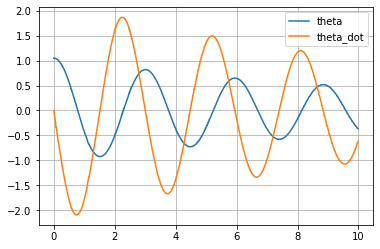

In [7]:
plt.plot(t,X[0],label='theta')
plt.plot(t,X[1],label='theta_dot')
plt.grid()
plt.legend()

In [8]:
def DMD(X,Xprime,r):
    U,S,VT = np.linalg.svd(X, full_matrices=0) # Step 1
    Ur = U[:,:r]
    Sr = np.diag(S[:r])
    VTr = VT[:r,:]
    Ar = Ur.T @ Xprime @ VTr.T @ fractional_matrix_power(Sr,-1)# Step 2
    Lambda, W = np.linalg.eig(Ar) # Step 3
    Lambda = np.diag(Lambda)
    
    Phi = Xprime @ VTr.T @ fractional_matrix_power(Sr,-1) @ W # Step 4
    b = np.linalg.pinv(Phi) @ X[:,0]
    return Phi, Lambda, b, Ar

In [9]:
Phi, Lambda, b, Ar = DMD(X[:,:-1],X[:,1:],2)

In [10]:
Y= np.zeros([2,len(ti)], dtype = 'complex_')
for i in range(len(ti)):
    Y[0,i],Y[1,i] = Phi @ fractional_matrix_power(Lambda ,i) @ b
    

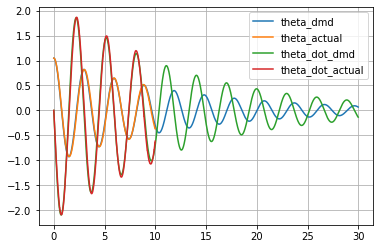

In [11]:
plt.plot(ti, Y[0].real, label ='theta_dmd' ) 
plt.plot(t, X[0], label ='theta_actual' )
plt.plot(ti, Y[1].real, label ='theta_dot_dmd' ) 
plt.plot(t, X[1], label ='theta_dot_actual' )
plt.grid()
plt.legend() 